### Web Crawling
- 1. requests : json : 동적 페이지(URL 변경 없이 데이터를 수정 및 추가), API
- 2. requests : html : 정적 페이지(URL 변경으로 데이터를 수정 및 추가)
- 3. selenium : web browser : 1, 2번 방법을 사용하지 못할 때 사용

### 1. 네이버 주식 데이터 크롤링(모바일)
- 코스피 데이터 수집
- 코스닥 데이터 수집
- USD환율 데이터 수집
- 그래프 그리기
- 상관계수를 확인

### 크롤링 절차
- 1. 웹서비스 분석 : URL 분석하기
- 2. request, response 하기 : json 얻기
- 3. 문자열 json 데이터를 dict로 변경(파싱) 후 데이터프레임으로 생성

## 코스피 데이터 수집

In [1]:
import requests

#### 1. 웹서비스 분석 : URL

In [41]:
url = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSPI&pageSize=20&page=1"

#### 2. request, response : JSON(str)

In [42]:
# get방식
response = requests.get(url) # url로 요청을하고 response 객체로 받는다.
response # <Response [200]> : 성공했다는 것을 의미

<Response [200]>

In [43]:
# 받아온 데이터 확인
response.text

'{"resultCode":"success","result":{"siseList":[{"cd":"KOSPI","dt":"20191107","ncv":2144.29,"cv":0.14,"cr":0.01,"ov":2141.05,"hv":2147.01,"lv":2135.45},{"cd":"KOSPI","dt":"20191106","ncv":2144.15,"cv":1.51,"cr":0.07,"ov":2142.69,"hv":2156.23,"lv":2138.83},{"cd":"KOSPI","dt":"20191105","ncv":2142.64,"cv":12.4,"cr":0.58,"ov":2133.66,"hv":2143.12,"lv":2128.7},{"cd":"KOSPI","dt":"20191104","ncv":2130.24,"cv":30.04,"cr":1.43,"ov":2111.32,"hv":2130.83,"lv":2111.32},{"cd":"KOSPI","dt":"20191101","ncv":2100.2,"cv":16.72,"cr":0.8,"ov":2084.79,"hv":2100.42,"lv":2081.53},{"cd":"KOSPI","dt":"20191031","ncv":2083.48,"cv":3.21,"cr":0.15,"ov":2089.22,"hv":2103.71,"lv":2083.48},{"cd":"KOSPI","dt":"20191030","ncv":2080.27,"cv":-12.42,"cr":-0.59,"ov":2093.51,"hv":2093.51,"lv":2075.54},{"cd":"KOSPI","dt":"20191029","ncv":2092.69,"cv":-0.91,"cr":-0.04,"ov":2103.92,"hv":2105.17,"lv":2088.04},{"cd":"KOSPI","dt":"20191028","ncv":2093.6,"cv":5.71,"cr":0.27,"ov":2096.67,"hv":2104.39,"lv":2089.76},{"cd":"KOSPI",

#### 3. str 데이터를 dict로 파싱 후 데이터 프레임으로 만들기

In [44]:
# 원하는 데이터
kospi_data = response.json()["result"]["siseList"]
type(kospi_data), len(kospi_data)

(list, 20)

In [45]:
# 데이터 확인
kospi_data[:1]

[{'cd': 'KOSPI',
  'dt': '20191107',
  'ncv': 2144.29,
  'cv': 0.14,
  'cr': 0.01,
  'ov': 2141.05,
  'hv': 2147.01,
  'lv': 2135.45}]

In [48]:
# 데이터 프레임으로 생성
kospi_df = pd.DataFrame(kospi_data)
kospi_df.tail(3)

,cd,cr,cv,dt,hv,lv,ncv,ov
17,KOSPI,0.04,0.77,20191015,2073.21,2064.34,2068.17,2064.78
18,KOSPI,1.11,22.79,20191014,2075.10,2065.53,2067.40,2068.13
19,KOSPI,0.81,16.46,20191011,2053.94,2040.48,2044.61,2048.08


## 코스닥 크롤링

In [34]:
url = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSDAQ&pageSize=20&page=1"

In [35]:
response = requests.get(url)
response

<Response [200]>

In [38]:
kosdaq_data = response.json()["result"]["siseList"]
kosdaq_data[0]

{'cd': 'KOSDAQ',
 'dt': '20191107',
 'ncv': 666.15,
 'cv': -3.53,
 'cr': -0.53,
 'ov': 668.73,
 'hv': 669.57,
 'lv': 663.7}

In [40]:
kosdaq_df = pd.DataFrame(kosdaq_data)
kosdaq_df.tail(3)

,cd,cr,cv,dt,hv,lv,ncv,ov
17,KOSDAQ,0.83,5.34,20191015,647.40,641.49,646.80,641.51
18,KOSDAQ,1.34,8.51,20191014,643.41,637.69,641.46,638.65
19,KOSDAQ,-0.28,-1.78,20191011,638.49,632.92,632.95,638.22


## USD환율 크롤링

In [24]:
url = "https://m.stock.naver.com/api/json/marketindex/marketIndexDay.nhn?marketIndexCd=FX_USDKRW&pageSize=20&page=1"

In [26]:
response = requests.get(url)
response

<Response [200]>

In [31]:
usd_data = response.json()["result"]["marketIndexDay"]
usd_data[0]

{'dt': '20191107',
 'nv': 1159.3,
 'cv': 0.8,
 'cr': 0.07,
 'cbv': 1179.58,
 'csv': 1139.02,
 'sv': 1170.6,
 'rv': 1148.0}

In [49]:
usd_df = pd.DataFrame(usd_data)
usd_df.tail(3)

,cbv,cr,csv,cv,dt,nv,rv,sv
17,1207.16,0.08,1165.64,0.9,20191015,1186.4,1174.8,1198.0
18,1206.24,-0.04,1164.76,-0.5,20191014,1185.5,1173.9,1197.1
19,1206.75,-0.75,1165.25,-9.0,20191011,1186.0,1174.4,1197.6


In [50]:
len(kospi_df), len(kosdaq_df), len(usd_df)

(20, 20, 20)

#### 수집한 데이터 그래프로 그리기

In [55]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
# jupyter notebook에서 그래프를 그릴 수 있게 해주는 설정
%matplotlib inline 
%config InlineBackend.figure_formats = {'png', 'retina'} # retina 해상도 사용 설정

#### 1. 코스피 , 코스닥, USD환율 종가 데이터 그리기

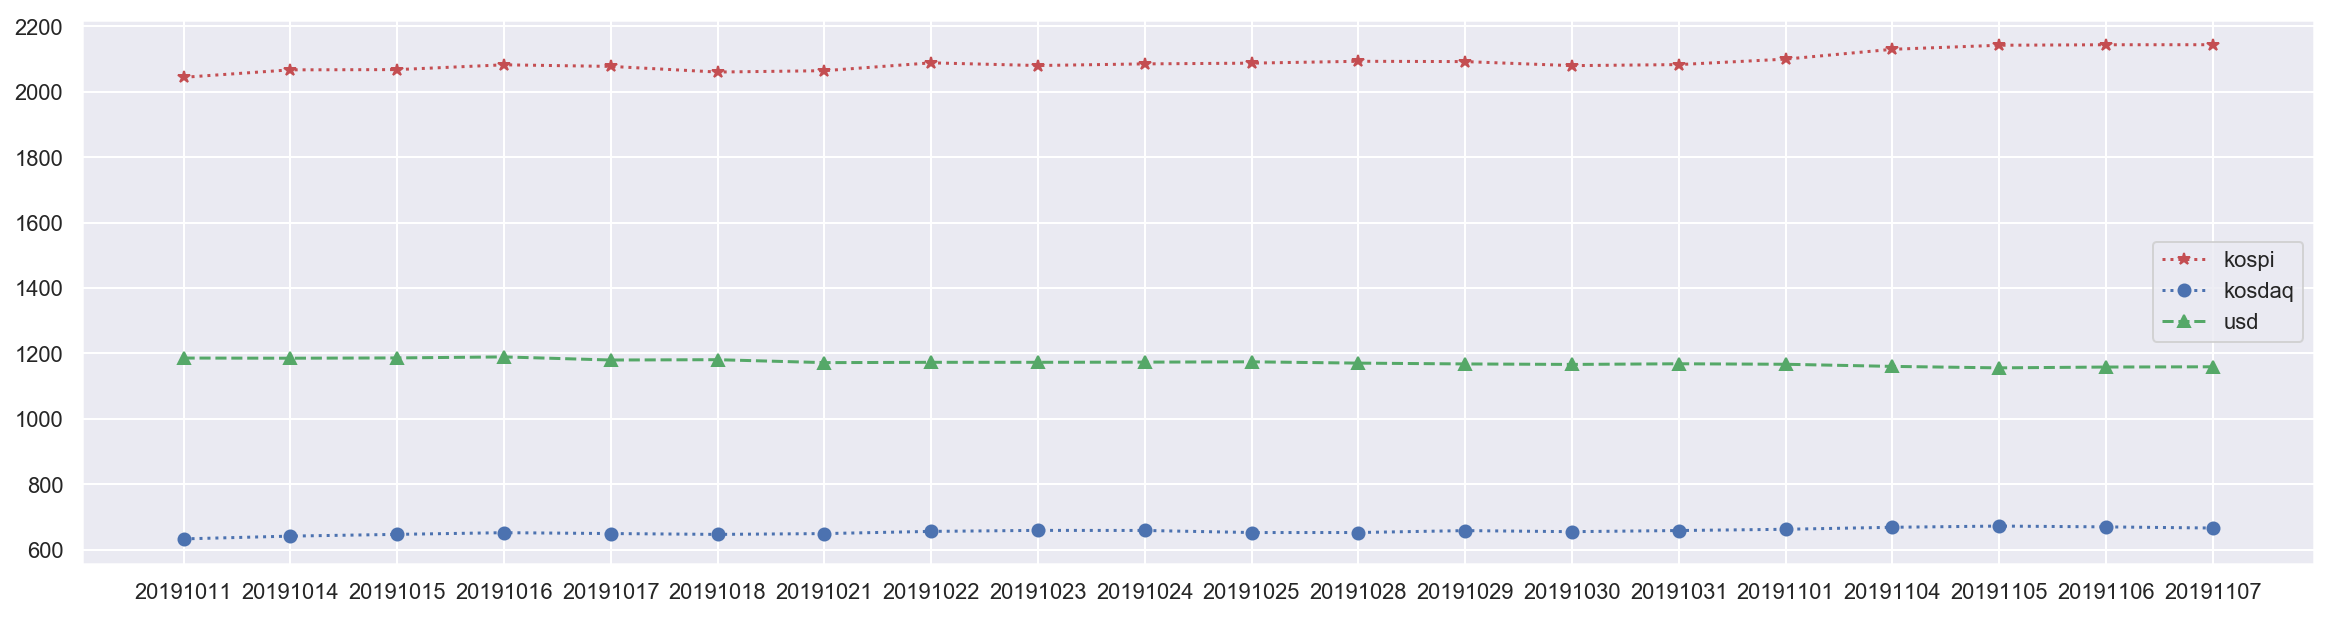

In [72]:
plt.figure(figsize=(20, 5))
plt.plot(kospi_df[::-1]["dt"], kospi_df[::-1]["ncv"], "r*:", label="kospi")
plt.plot(kosdaq_df[::-1]["dt"], kosdaq_df[::-1]["ncv"], "bo:", label="kosdaq")
plt.plot(usd_df[::-1]["dt"], usd_df[::-1]["nv"], "g^--", label="usd")
plt.legend(loc=0)
plt.show()

### 정규화 : Nomalization
- `z = (x - min(x)) / (max(x) - min(x))`

In [74]:
from sklearn import preprocessing

In [75]:
preprocessing.minmax_scale(kospi_df[::-1]["ncv"])

array([0.        , 0.22863162, 0.23635634, 0.38342697, 0.33436998,
       0.16131621, 0.20294944, 0.44392055, 0.36125602, 0.41181782,
       0.43418941, 0.49147271, 0.4823435 , 0.35774478, 0.38994783,
       0.55768459, 0.85904896, 0.98344703, 0.99859551, 1.        ])

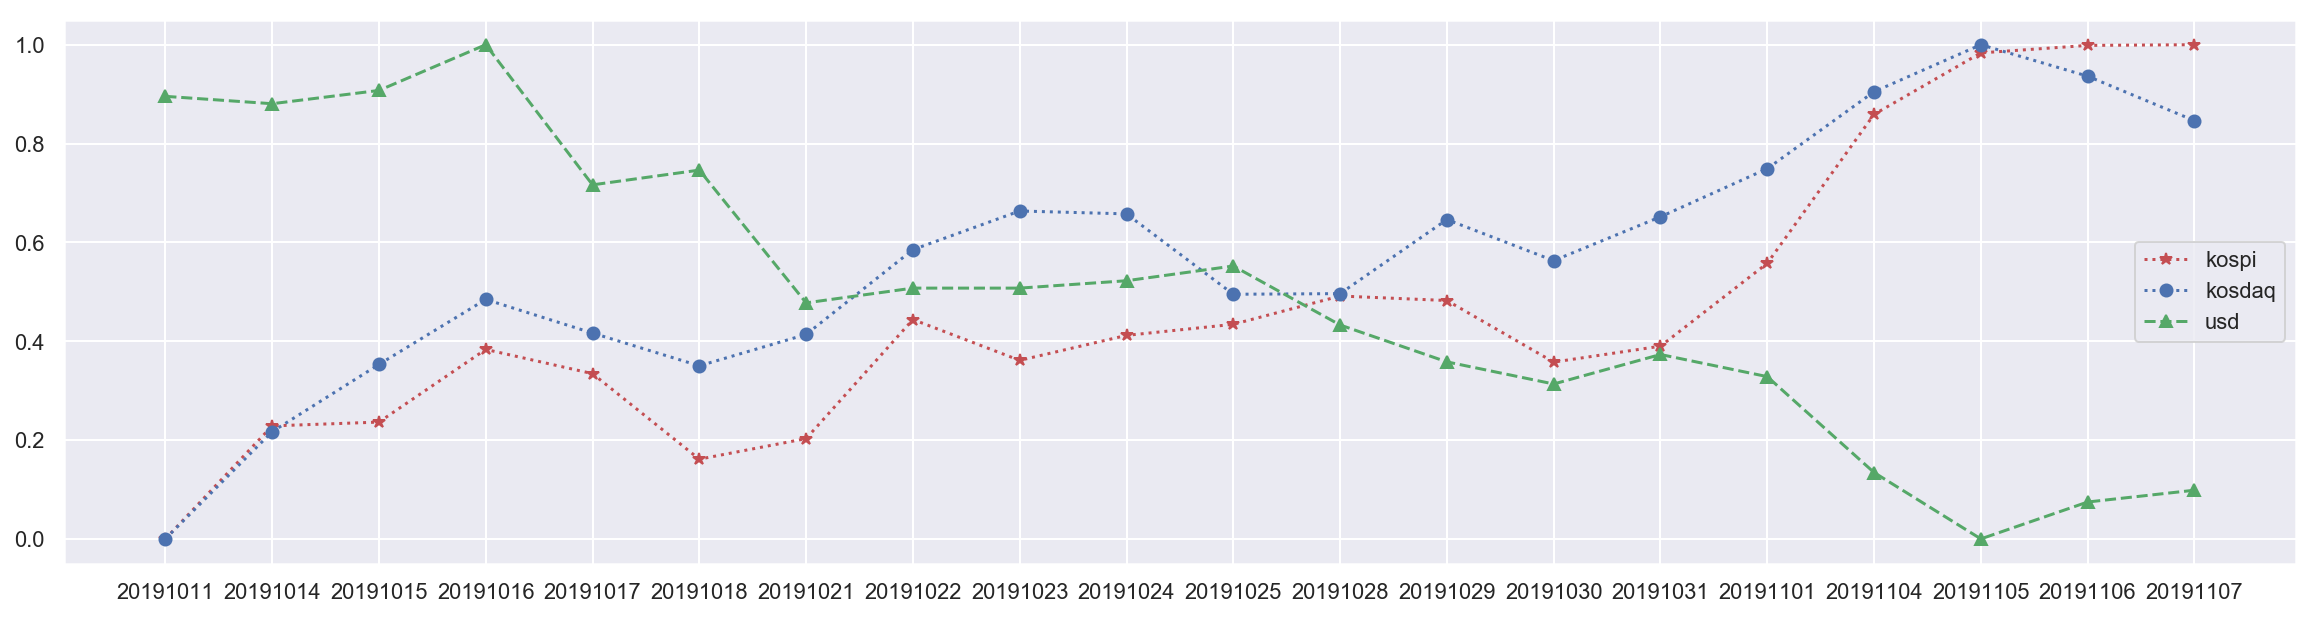

In [76]:
plt.figure(figsize=(20, 5))
plt.plot(kospi_df[::-1]["dt"], preprocessing.minmax_scale(kospi_df[::-1]["ncv"]), "r*:", label="kospi")
plt.plot(kosdaq_df[::-1]["dt"], preprocessing.minmax_scale(kosdaq_df[::-1]["ncv"]), "bo:", label="kosdaq")
plt.plot(usd_df[::-1]["dt"], preprocessing.minmax_scale(usd_df[::-1]["nv"]), "g^--", label="usd")
plt.legend(loc=0)
plt.show()

### 상관계수로 데이터를 파악

In [77]:
import numpy as np

In [78]:
np.corrcoef(kospi_df["ncv"], kosdaq_df["ncv"])[0, 1]

0.9101026808848969

In [79]:
np.corrcoef(kospi_df["ncv"], usd_df["nv"])[0, 1]

-0.8397389321406791

In [81]:
np.corrcoef(kosdaq_df["ncv"], usd_df["nv"])[0, 1]

-0.8761635494742896